# PIK3CA transcriptomics cis comparison

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [26]:
en_object = cptac.Endometrial()
desired_cutoff = .2

endometrial_freq_mut = al.get_frequently_mutated(en_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(endometrial_freq_mut), '\n')
endometrial_freq_mut.loc[endometrial_freq_mut['Gene'] == 'PIK3CA']

                                    

Number of Frequently Mutated Genes: 10 



,Gene,Unique_Samples_Mut,Missence_Mut,Truncation_Mut
5,PIK3CA,0.494737,0.484211,0.010526


## Step 3: Select PIK3CA, a frequently mutated gene

In [3]:
gene = 'PIK3CA'

## Step 4: Select transcriptomics

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [4]:
omics = en_object.get_transcriptomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. The first three steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.
5. visualize data 

In [5]:
# Steps 1-3
en_status = f.format_cis_comparison_data(en_object, omics, 'transcriptomics', gene)
en_status.head()

,PIK3CA_transcriptomics,binary_mutations
Sample_ID,,
S001,11.12,Mutated
S002,10.96,Wildtype
S003,11.08,Mutated
S005,11.02,Wildtype
S006,11.71,Wildtype


In [6]:
omics_col_list = ['PIK3CA_transcriptomics']
transcriptomics_col = gene+'_transcriptomics'

# Step 4 - T-test comparing means of mutated vs. wildtype effect on cis omics
print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(en_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


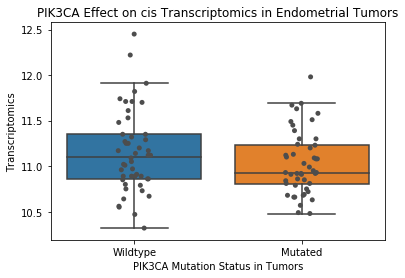

In [7]:
# Step 5 - Create box plot to compare wildtype and mutated effect on omics data
en_cis_boxplot = sns.boxplot(data = en_status, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Wildtype","Mutated"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Effect on cis Transcriptomics in Endometrial Tumors")
en_cis_boxplot = sns.stripplot(data= en_status, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()

Repeat above steps with mutation type comparison (missense vs. truncation)

In [8]:
# Prepare data frame for T-test
en_type = f.get_missence_truncation_comparison(en_object, omics, 'transcriptomics', gene)
#print(en_type.head())

# T-test comparing means of missense vs. truncation effect on cis omics
print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(en_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


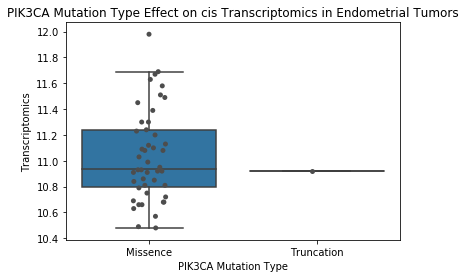

In [9]:
# Step 5 - Create boxplt to compare missense and truncation type effect on omics data
en_cis_boxplot = sns.boxplot(data = en_type, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Missence","Truncation"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Transcriptomics in Endometrial Tumors")
en_cis_boxplot = sns.stripplot(data= en_type, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
en_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Transcriptomics')
plt.show()

# Repeat with the Colon dataset

In [19]:
colon_object = cptac.Colon()
desired_cutoff = .2

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff = desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(colon_freq_mut), '\n')
colon_freq_mut.loc[colon_freq_mut['Gene'] == 'PIK3CA']

                                    

Number of Frequently Mutated Genes: 39 



,Gene,Unique_Samples_Mut,Missence_Mut,Truncation_Mut
25,PIK3CA,0.247423,0.237113,0.010309


In [20]:
gene = 'PIK3CA'

co_omics = colon_object.get_transcriptomics()

In [21]:
co_status = f.format_cis_comparison_data(colon_object, co_omics, 'transcriptomics', gene)
#co_data_for_comparison.head()

print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(co_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


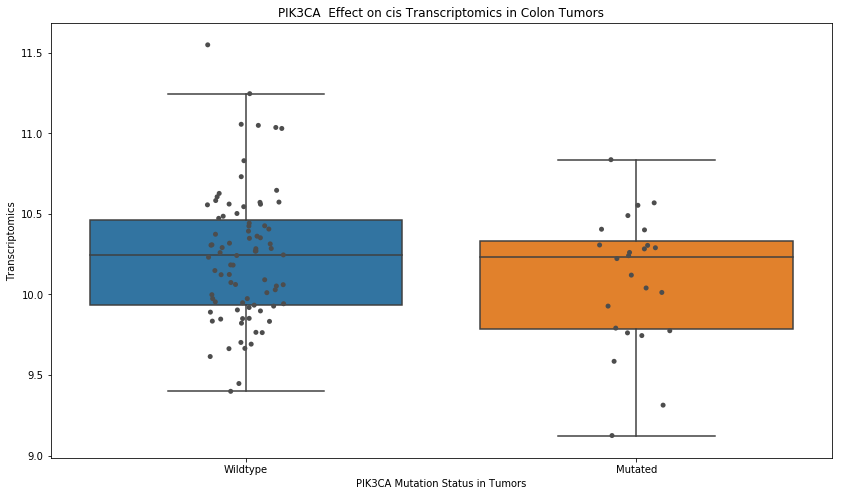

In [22]:
cis_boxplot = sns.boxplot(data = co_status, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + "  Effect on cis Transcriptomics in Colon Tumors")
cis_boxplot = sns.stripplot(data = co_status, x = 'binary_mutations',
                            y = transcriptomics_col, jitter = True, color = ".3", 
                            order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()

In [23]:
co_type = f.get_missence_truncation_comparison(colon_object, co_omics, 'transcriptomics', gene)

print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(co_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


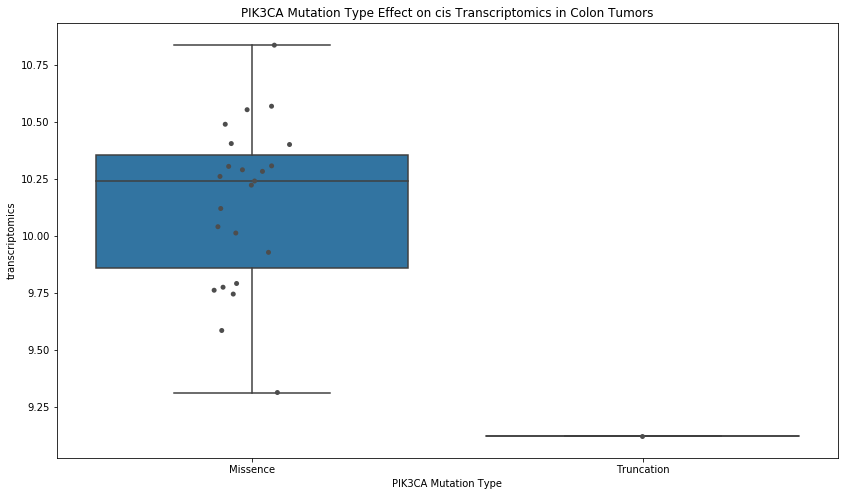

In [24]:
co_cis_boxplot = sns.boxplot(data = co_type, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Missence","Truncation"], showfliers = False)  
co_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Transcriptomics in Colon Tumors")
co_cis_boxplot = sns.stripplot(data= co_type, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
co_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'transcriptomics')
plt.show()

# Visualize Pancancer effects

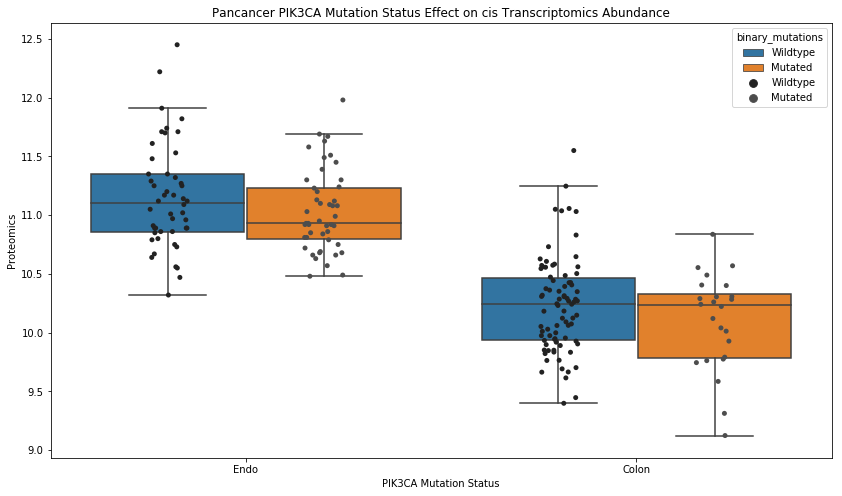

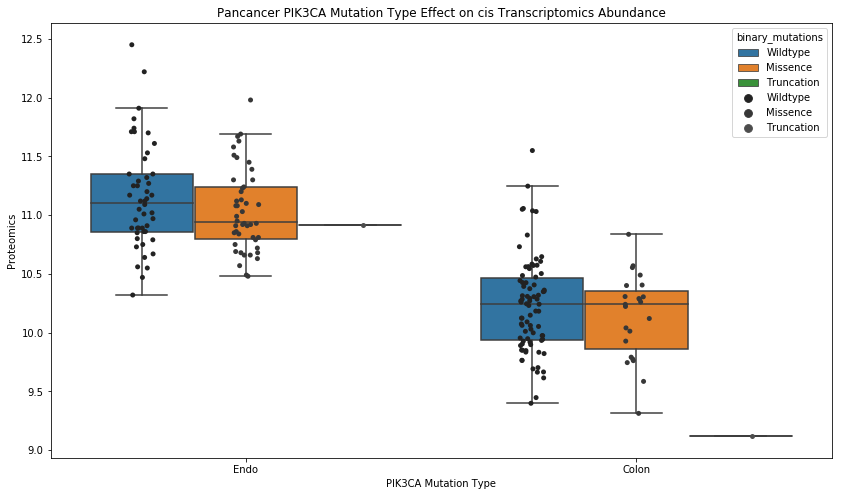

In [25]:
# Create a dataframe with pancancer data and labeling for mutation status and type
en_mut_status = en_status.assign(Cancer= 'Endo')
co_mut_status = co_status.assign(Cancer= 'Colon')
en_mut_type = en_type.assign(Cancer= 'Endo')
co_mut_type = co_type.assign(Cancer= 'Colon')

pancancer_data = pd.concat([en_mut_status, co_mut_status, en_mut_type, co_mut_type]) 
pancancer_df = pd.melt(pancancer_data, id_vars=['Cancer','binary_mutations'], value_name= 'transcriptomics')  

# Visualize mutation status (mutated vs. wildtype) accross cancers
plt.rcParams['figure.figsize']=(14,8) #size of plot
cis_status = sns.boxplot(
    x='Cancer', y="transcriptomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Mutated'], data=pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Status Effect on cis Transcriptomics Abundance")
cis_status = sns.stripplot(x='Cancer', y="transcriptomics", hue = 'binary_mutations', data=pancancer_df,
                            jitter = True, color = ".3", hue_order = ['Wildtype', 'Mutated'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Status", ylabel = 'Proteomics')

plt.show()

plt.clf()
plt.close()

# Visualize mutation type (missence vs. truncation) accross cancers
cis_status = sns.boxplot(
    x='Cancer', y="transcriptomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Missence', 'Truncation'], 
    data = pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Type Effect on cis Transcriptomics Abundance")
cis_status = sns.stripplot(
    x='Cancer', y="transcriptomics", hue = 'binary_mutations', data = pancancer_df, jitter = True, color = ".3", 
    hue_order = ['Wildtype', 'Missence', 'Truncation'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')
plt.rcParams['figure.figsize']=(14,8) #size of plot
plt.show()

plt.clf()
plt.close()

# Analysis of Results

No significant comparisons